- Most effective ML people is they're very clear-eyed about what to tune in order to try to achieve one effect. This process is orthogonalization.
- Supervice ML (chain of assumptions)
    - Fit training set well on cost function ($\approx$humand level performance)
        - bigger network
        - different optimizer
    - Fit dev set well on cost function
        - regularization 
        - bigger training set
    - Fit test set well on costfunction
        - bigger dev set 
    - Performs well in real world
        - change the dev set or cost function
- Early stopping fits the train set less well but can improve your dev set metrics

- Using a single number evaluation metric to pick a model (e.g. when you have precision and recall is better to comabine them by using F1 score to pick the model, another example is to average the numbers)
- Satisficing and optimizing metric
    - pick a classifier that maximizes accuracy but the satisficing time is less than some #
- Setting train/dev (hold out cross validation set)/test set distributions 
    - test set and dev set need to be better from the same distribution
    - randomly select dev and test set from the same data so they can have the same distribution
    - Choose a dev set and test to reflect data you expect to get in the future and consider important to do well on
- Size of the dev/test sets
    - if you have < 10,000 then train/test can be 70%/30% or train/dev/test be 60%/20%/20%
    - if you have > 1,000,000 then train test can e 98%/1%/1%
- Size of the test set
    - set your test set to be big enough to give high confidence in the overall performance of your system
    - if you only have a test set to test then it is better to call it dev set
- When to change dev/test sets and metrics?
    - 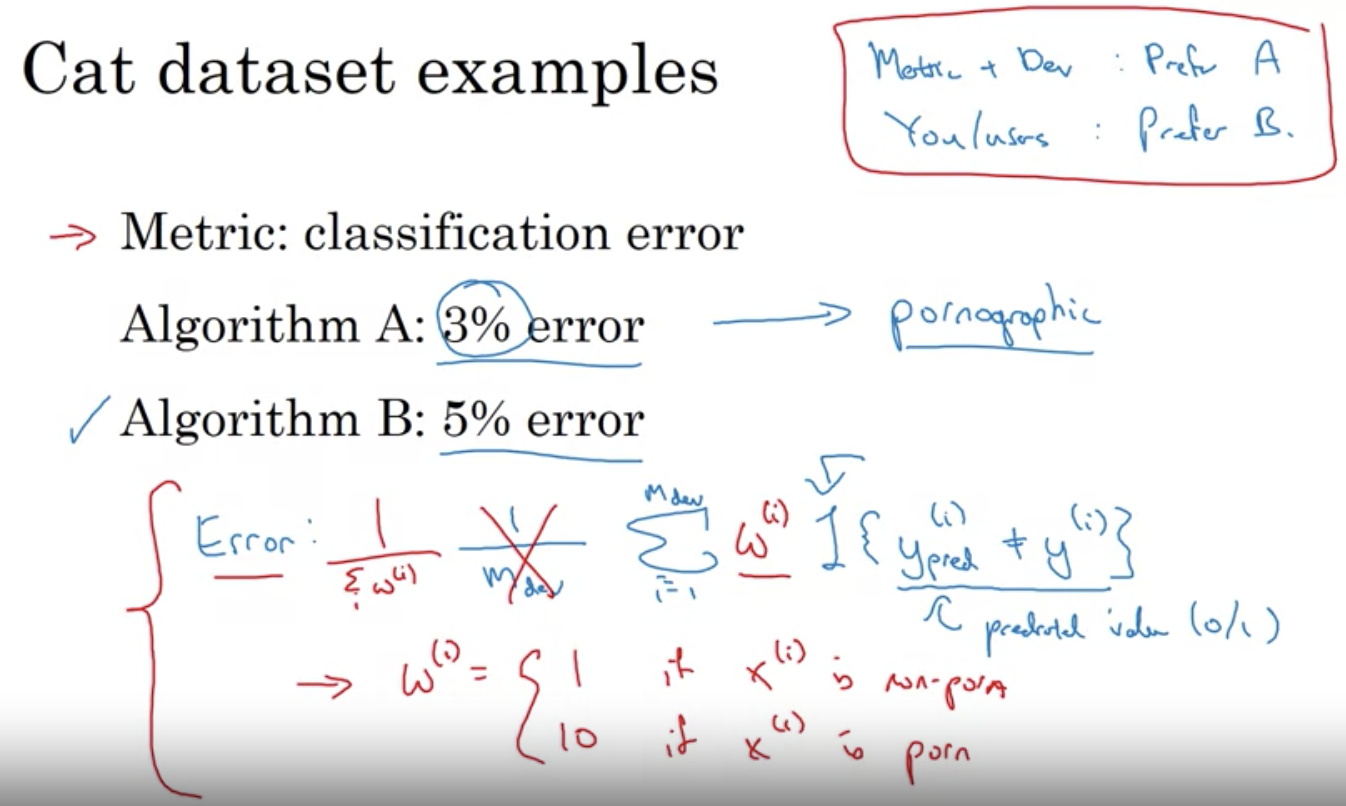
    - First define a metric to evaluate the classifier 
    - then worry on how to well on this metric
- Why human-level performance?
    - Bayes optimal error (best optimal error) is the lowest achievable error rate for a classifier when the true underlying distribution is known, and it serves as a reference point for evaluating the performance of machine learning models.
    - If a model's error rate is significantly higher than the estimated Bayes error, it suggests that there is still room for improvement, either by using a more sophisticated model or by collecting more informative features.
    - Perhaps when you surpase human level performance there is no much room for improvement 
    - gain insights from a manual error analysis (why did a person get this right?)
    - better analysis of bias/variance

- Avoidable bias
    - you can't do better than Bayes error (if you do, you may be overfitting)
    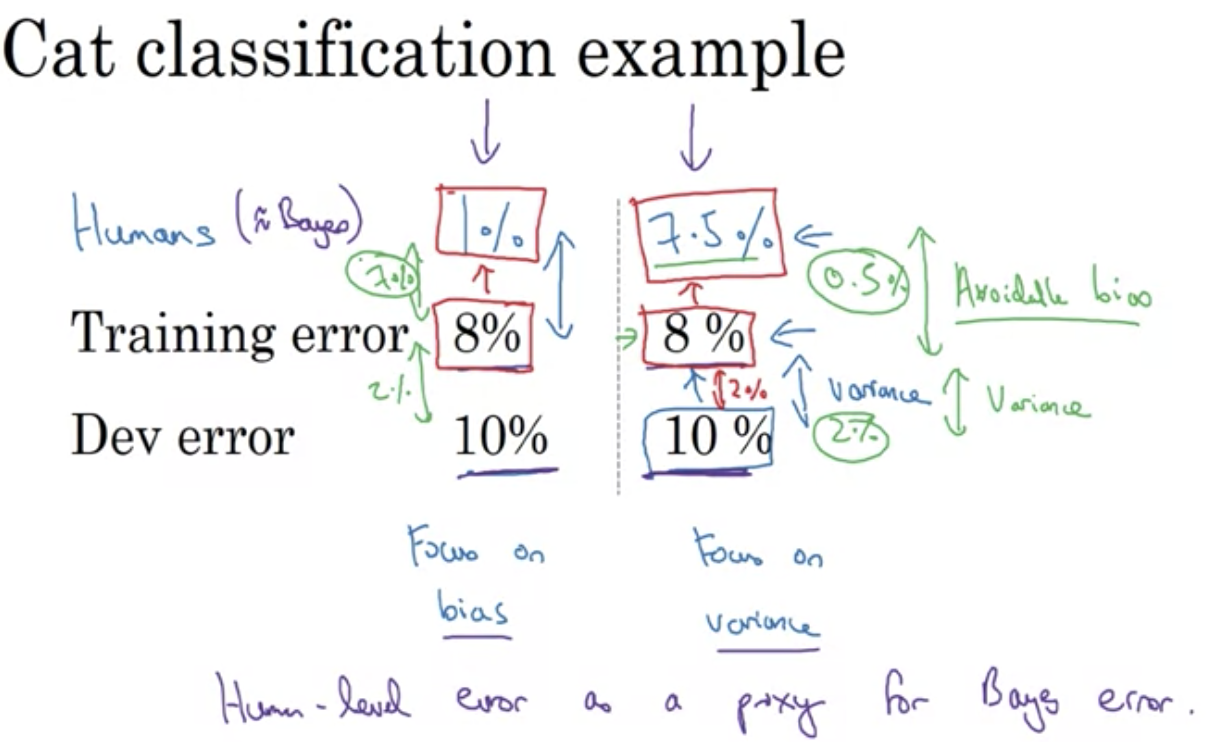
    
- Human-level error as a proxy for Bayes error
    - define the human-level error
    
- Surpassing human-level performance
    - online advertising
    - product recommendations
    - logistics (predicting transit time)
    - loan approvals
    - structure data 
    - not natural perception
- Improving your model performance
    - the two fundamental assumptions of supervised learning
        - you can fit training set pretty well (avoidable bias)
            - train bigger model
            - train longer/better optimization algorithms
                - momentum, RMSprop, Adam
            - NN architecture/ hyperparameters search (RNN/CNN)
        - the training set performance generalizes pretty well to the dev/test set (variance)
            - More data 
            - Regularization
                - L2, dropout, data augmentation
            - NN architecture/hyperparameters search
- Stakeholders must define thresholds for satisficing metrics, leaving the optimizing metric unbounded.


**Error Analysis**

- The goal of the dev set is to help you select between two classifiers (e.g. model A and model B)
- Evaluate multiple ideas in parallel
- Cleaning Up incorrectly labeled data
    - DL algorithms are quite robust to random errors in the training set(if they are random)
    - DL algorithm less robust to systematic errors
    - in the error analysis analyze the % of incorrect label 
- Correcting incorrect dev/test set examples
    - apply same process to your dev and test sets to mmake sure they continue to come from the same distribution
    - consider examing examples your algorithm got right as well as ones it got wrong
    - train and dev.test data may now come from slighly different distributions (the ML models are more robust when using train and dev from different distributions)
- Build your first system quickly, then iterate
    - set up dev/test set and metric
    - build initial system quickly
    - use bias/variance analysis & error analysis to prioritize next steps
    


**Mismatched train and dev/test set**   

- Training and testing on different distributions 
    - example: if you want to classify a cat and have 200K web images and 10K mobile images. Then you can split by 205K train data (200K web 5K mobbile, 2.5K dev, and 2.5K test.
- Bias and variance with mismatched data distirbutions
    
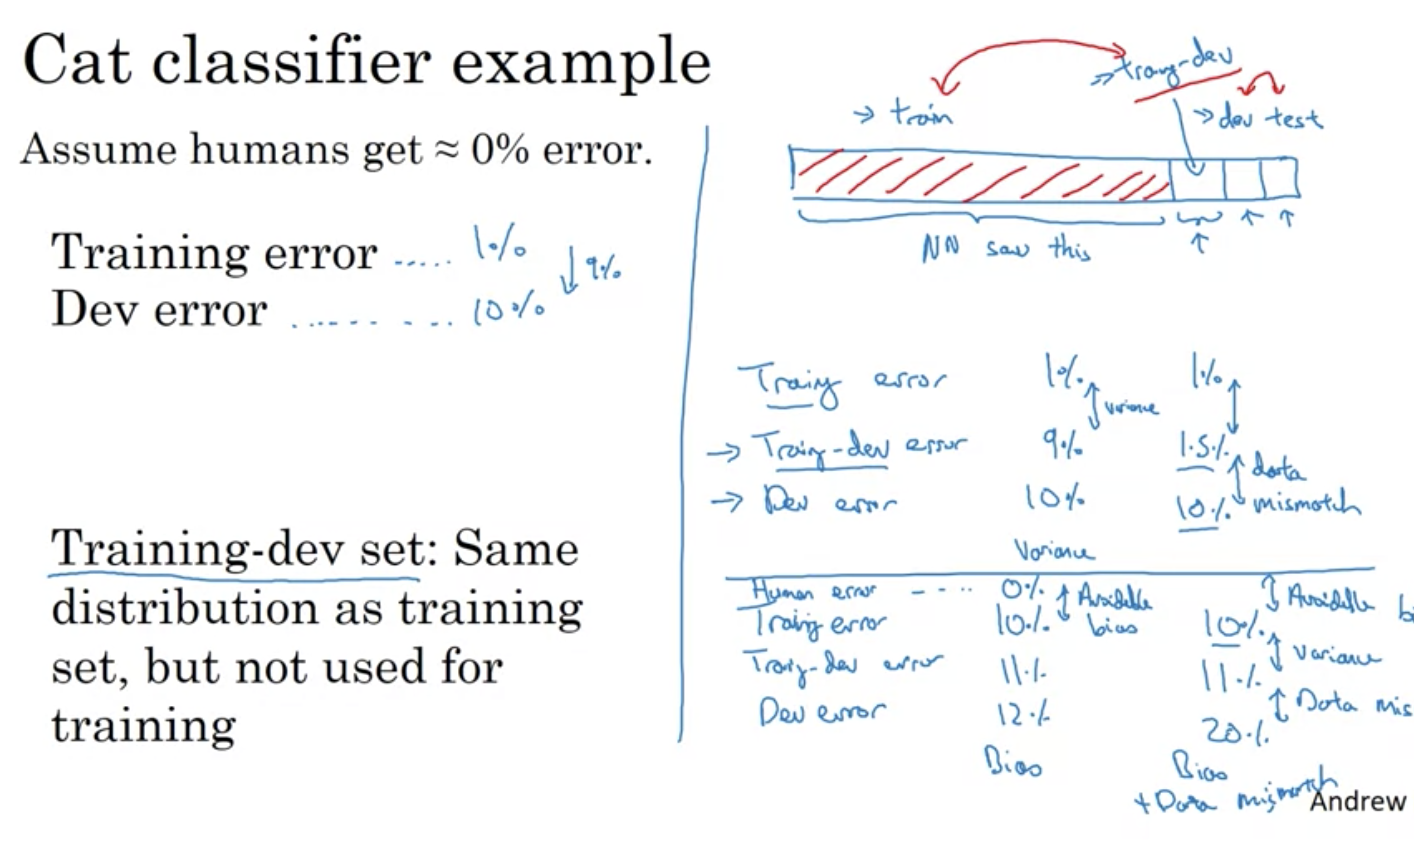

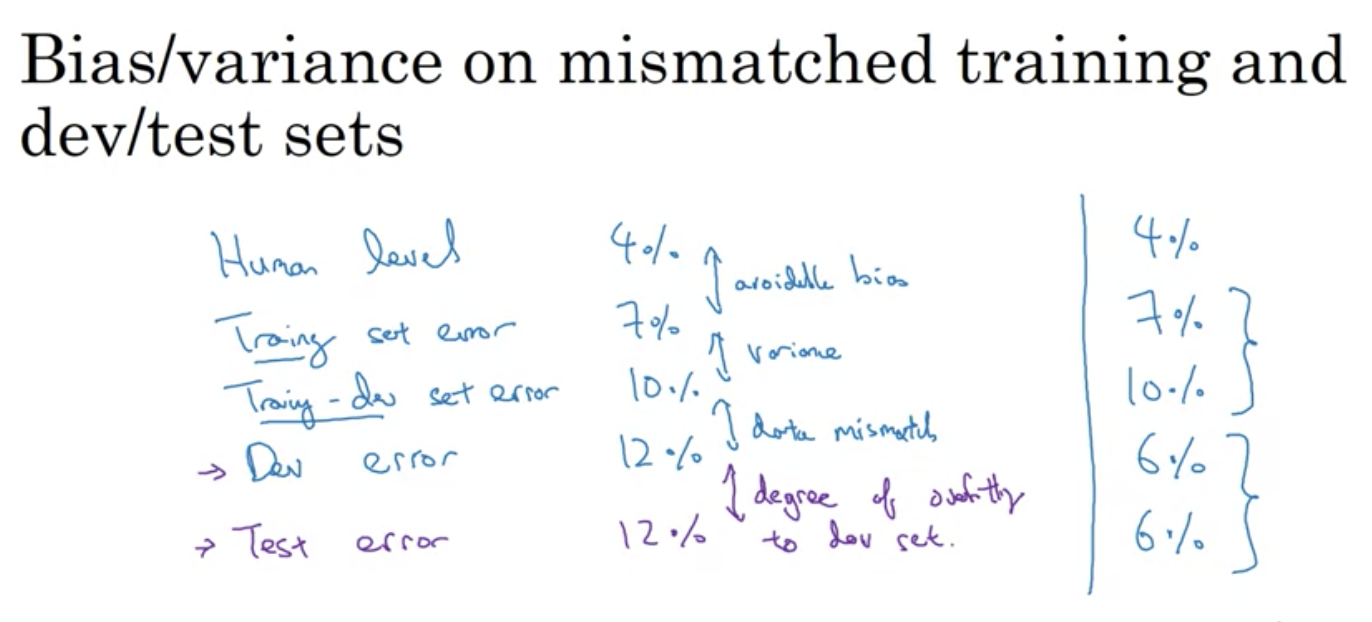

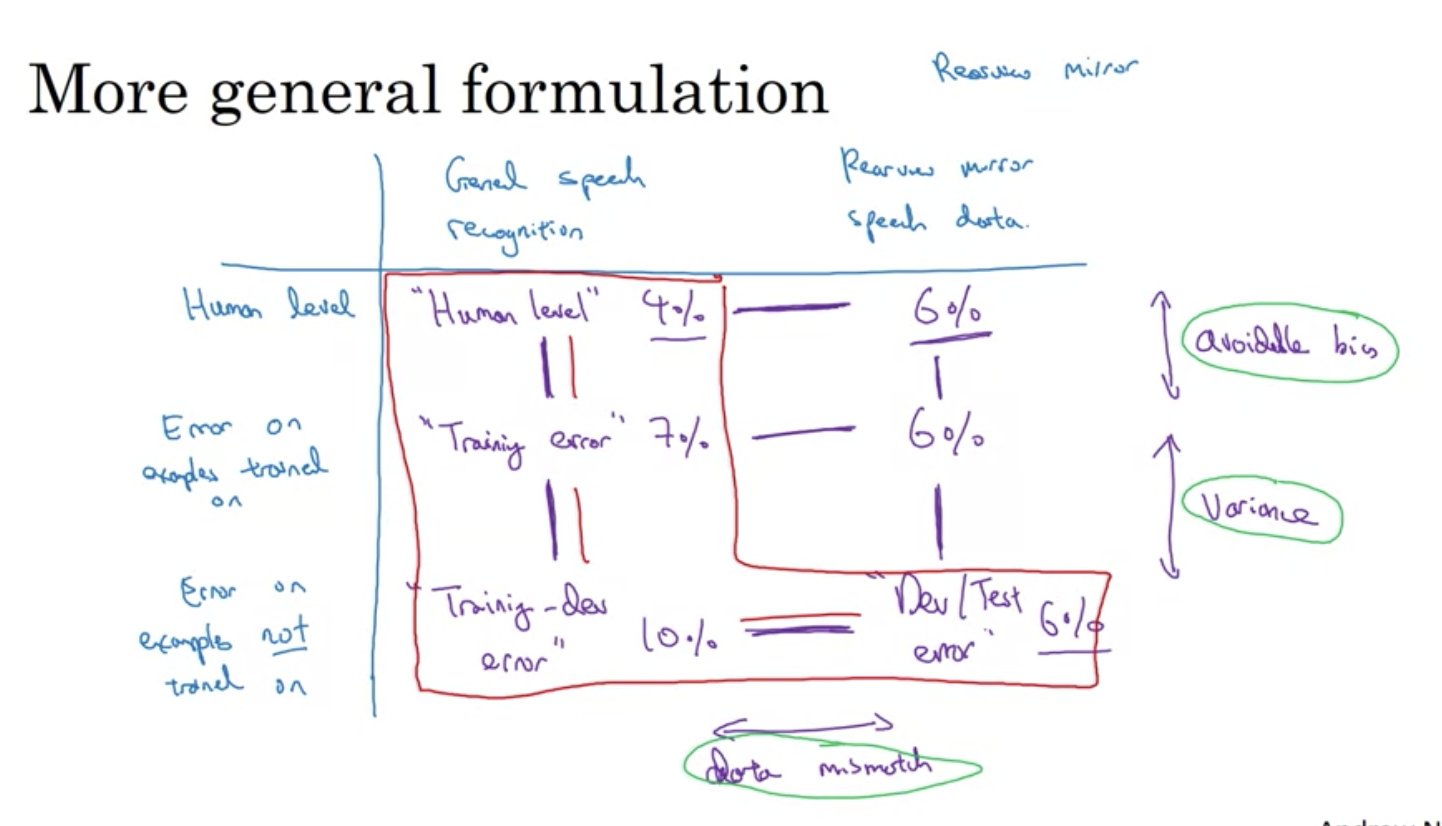

**Addressing data mismatch**

- Carry out manual error analysis to try to understand difference between training and dev/test sets
- Make training data more similar; or collect more data similar to dev/test sets
    - Artificial data synthesis (be cautious and bear in mind whether or not you might be accidentally simulating data only from a tiny subset of the space of all possible examples)
    
**Transfer Learning**

- if you want to transfer a model to a different task then (you have a lot of data from one task but less for another task - it not true of the other way around happens)
    1. delete the last outcome and the weights feeding into the last layer
    2. create a new set of randomly initialize weights just the last layer then have that output the last layer
    3. if you have enough data you can retain all the layers of the rest of the neural network. If small data then retrain the last output layer (or last two)
    4. you can also add new layers 
- fine tuning is to retrain all the weights while pre-training is to use existing weights
- When transfer learning makes sense?
    - task A and B have the same input x (e.g. images)
    - you have a lot more data for task A than task B
    - low level features from A could be helpful for learning B
- Multi task learning (MTL)
    - it is an approach where a single model is trained to perform multiple related tasks simultaneously. Instead of training separate models for each task, MTL aims to leverage the shared information between tasks to improve the overall performance of the model.
    - he objective is to optimize a joint loss function that combines the losses of all the tasks.
    -  I'is a powerful approach that can be leveraged to boost the performance of ML models when tasks share underlying patterns and relationships.
    - when MTL makes sense?
        - training on a set of tasks that could benefit from having a shared lower-level features
        - Usually: amunt of data you have for each task is quite similar 
        - can train a big enough neural network to do well on all the tasks (it will hurt performance if you have a small nn)


**End-to-end Deep Learning**

- it is an approach where a single neural network is used to directly map the input data to the desired output, without the need for explicit feature engineering or intermediate representations. In other words, the model learns to extract the relevant features and representations directly from the raw input data and produces the final output in a single step.
- The key characteristics of end-to-end deep learning include:
    1. No Handcrafted Features: End-to-end models learn representations from raw data, eliminating the need for domain-specific handcrafted features.
    2. Automatic Feature Learning: Neural networks can automatically learn hierarchical representations and features at different levels of abstraction from the input data.
    3. Direct Mapping: The model directly maps the input data to the output without relying on intermediate stages or handcrafted rules.
    4. End-to-End Optimization: The entire model is optimized as a whole, which can lead to better performance and faster convergence compared to multi-stage pipelines.

|Pros|Cons|
|:--------------:|:--------------:|
|Let the data speak|May need large amount of data| 
|Less hand-designing of components needed|Excludes potentionally useful hand-designed components| 

- Key question: do you have sufficient data to learn a function of the complexity needed to map x to y?